# Home loan Defaulter Prediction

## Problem Statement : Building a model to predict how capable each applicant is of repaying a loan, so that sanctioning loan only for the applicants who are likely to repay the loan.

## *Domain Analysis*

- This is case study understanding a particular bank loan defaulters. This bank give loan to applicants to those who can repay back or will ensure that they are capable of repaying back the loan. So this case study will identify the patterns for those applicants who may have difficulty in paying installments or be a defaulter by using current applications and previous applications status which may use in denying the loan, or reducing the loan amount, or lending at higher interest rate. So when any data is available or anyone applying for loan, the bank can check whether or not applied before, or payment difficulty or how long it take to repay the loan. Our goal is to take data and give information from the dataset.
1. application_train: The main training data with information about each loan application at Home Credit.The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. Here we will use only the Training data.
2. bureau: In this dataset it consists of data concerning client’s previous credits from other financial institutions.one loan in the application data can have multiple previous credits.
3. bureau_balance: It consists of monthly data about the previous credits in bureau.single previous credit can have multiple rows, one for each month of the credit length.
4. previous_application:The data of previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
5. POS_CASH_BALANCE: It consists of monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
6. credit_card_balance:The monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
7. installments_payment:The data of payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

## *Loading Datasets*

In [2]:
app=pd.read_csv("application_train.csv") #current applications
prev=pd.read_csv("previous_application.csv") #previous applications to check if anyone has applied before
bureau_bal=pd.read_csv("bureau_balance.csv")
bureau=pd.read_csv("bureau.csv")
credit=pd.read_csv("credit_card_balance.csv")
install=pd.read_csv("installments_payments.csv")
pos=pd.read_csv("POS_CASH_balance.csv")

## *Basic checks on application_train dataset*

In [4]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app.shape

(307511, 122)

In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 505.0 MB


- ### Dataset Overview:
- Number of Rows (Entries): 307,511
- Number of Columns: 122
- Memory Usage: Approximately 286.2 MB
- ### Data Types:
- Float Columns: 65
- Integer Columns: 41
- Object Columns: 16

In [8]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


- Target column is a highly imbalanced dataset where the majority of the entries have TARGET = 0
- Negative values indicate age in days.The maximum (-7,489) corresponds to a person approximately 20.5 years old, while the minimum (-25,229) is about 69.1 years old. So we will do ['DAYS_BIRTH']/-365
- Credit amounts range widely from 45,000 to 4,050,000, with a mean of 599,026.
- AMT_REQ_CREDIT_BUREAU_ columns might have missing data.
- AMT_INCOME_TOTAL, CNT_CHILDREN, and DAYS_EMPLOYED columns might have outliers.

In [10]:
# for categorical data
app.describe(include='O')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [11]:
# checking unique values
app.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [12]:
# printing all columns
for i in app.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [13]:
# checking for null values
for col in app.columns:
    print(col,app[col].isnull().sum())

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

- Lots of column contain null values

In [15]:
# checking for duplicate rows
app.duplicated().sum()

0

In [16]:
# unique values of TARGET column
app['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

- No. of defaulters:  24825- 
No. of non-defaulters:  282686

## *EDA for application_train dataset*

## *Univariate analysis*

In [20]:
# for categorical data
app_cat=[feature for feature in app.columns if app[feature].dtype=="O"]
len(app_cat)

16

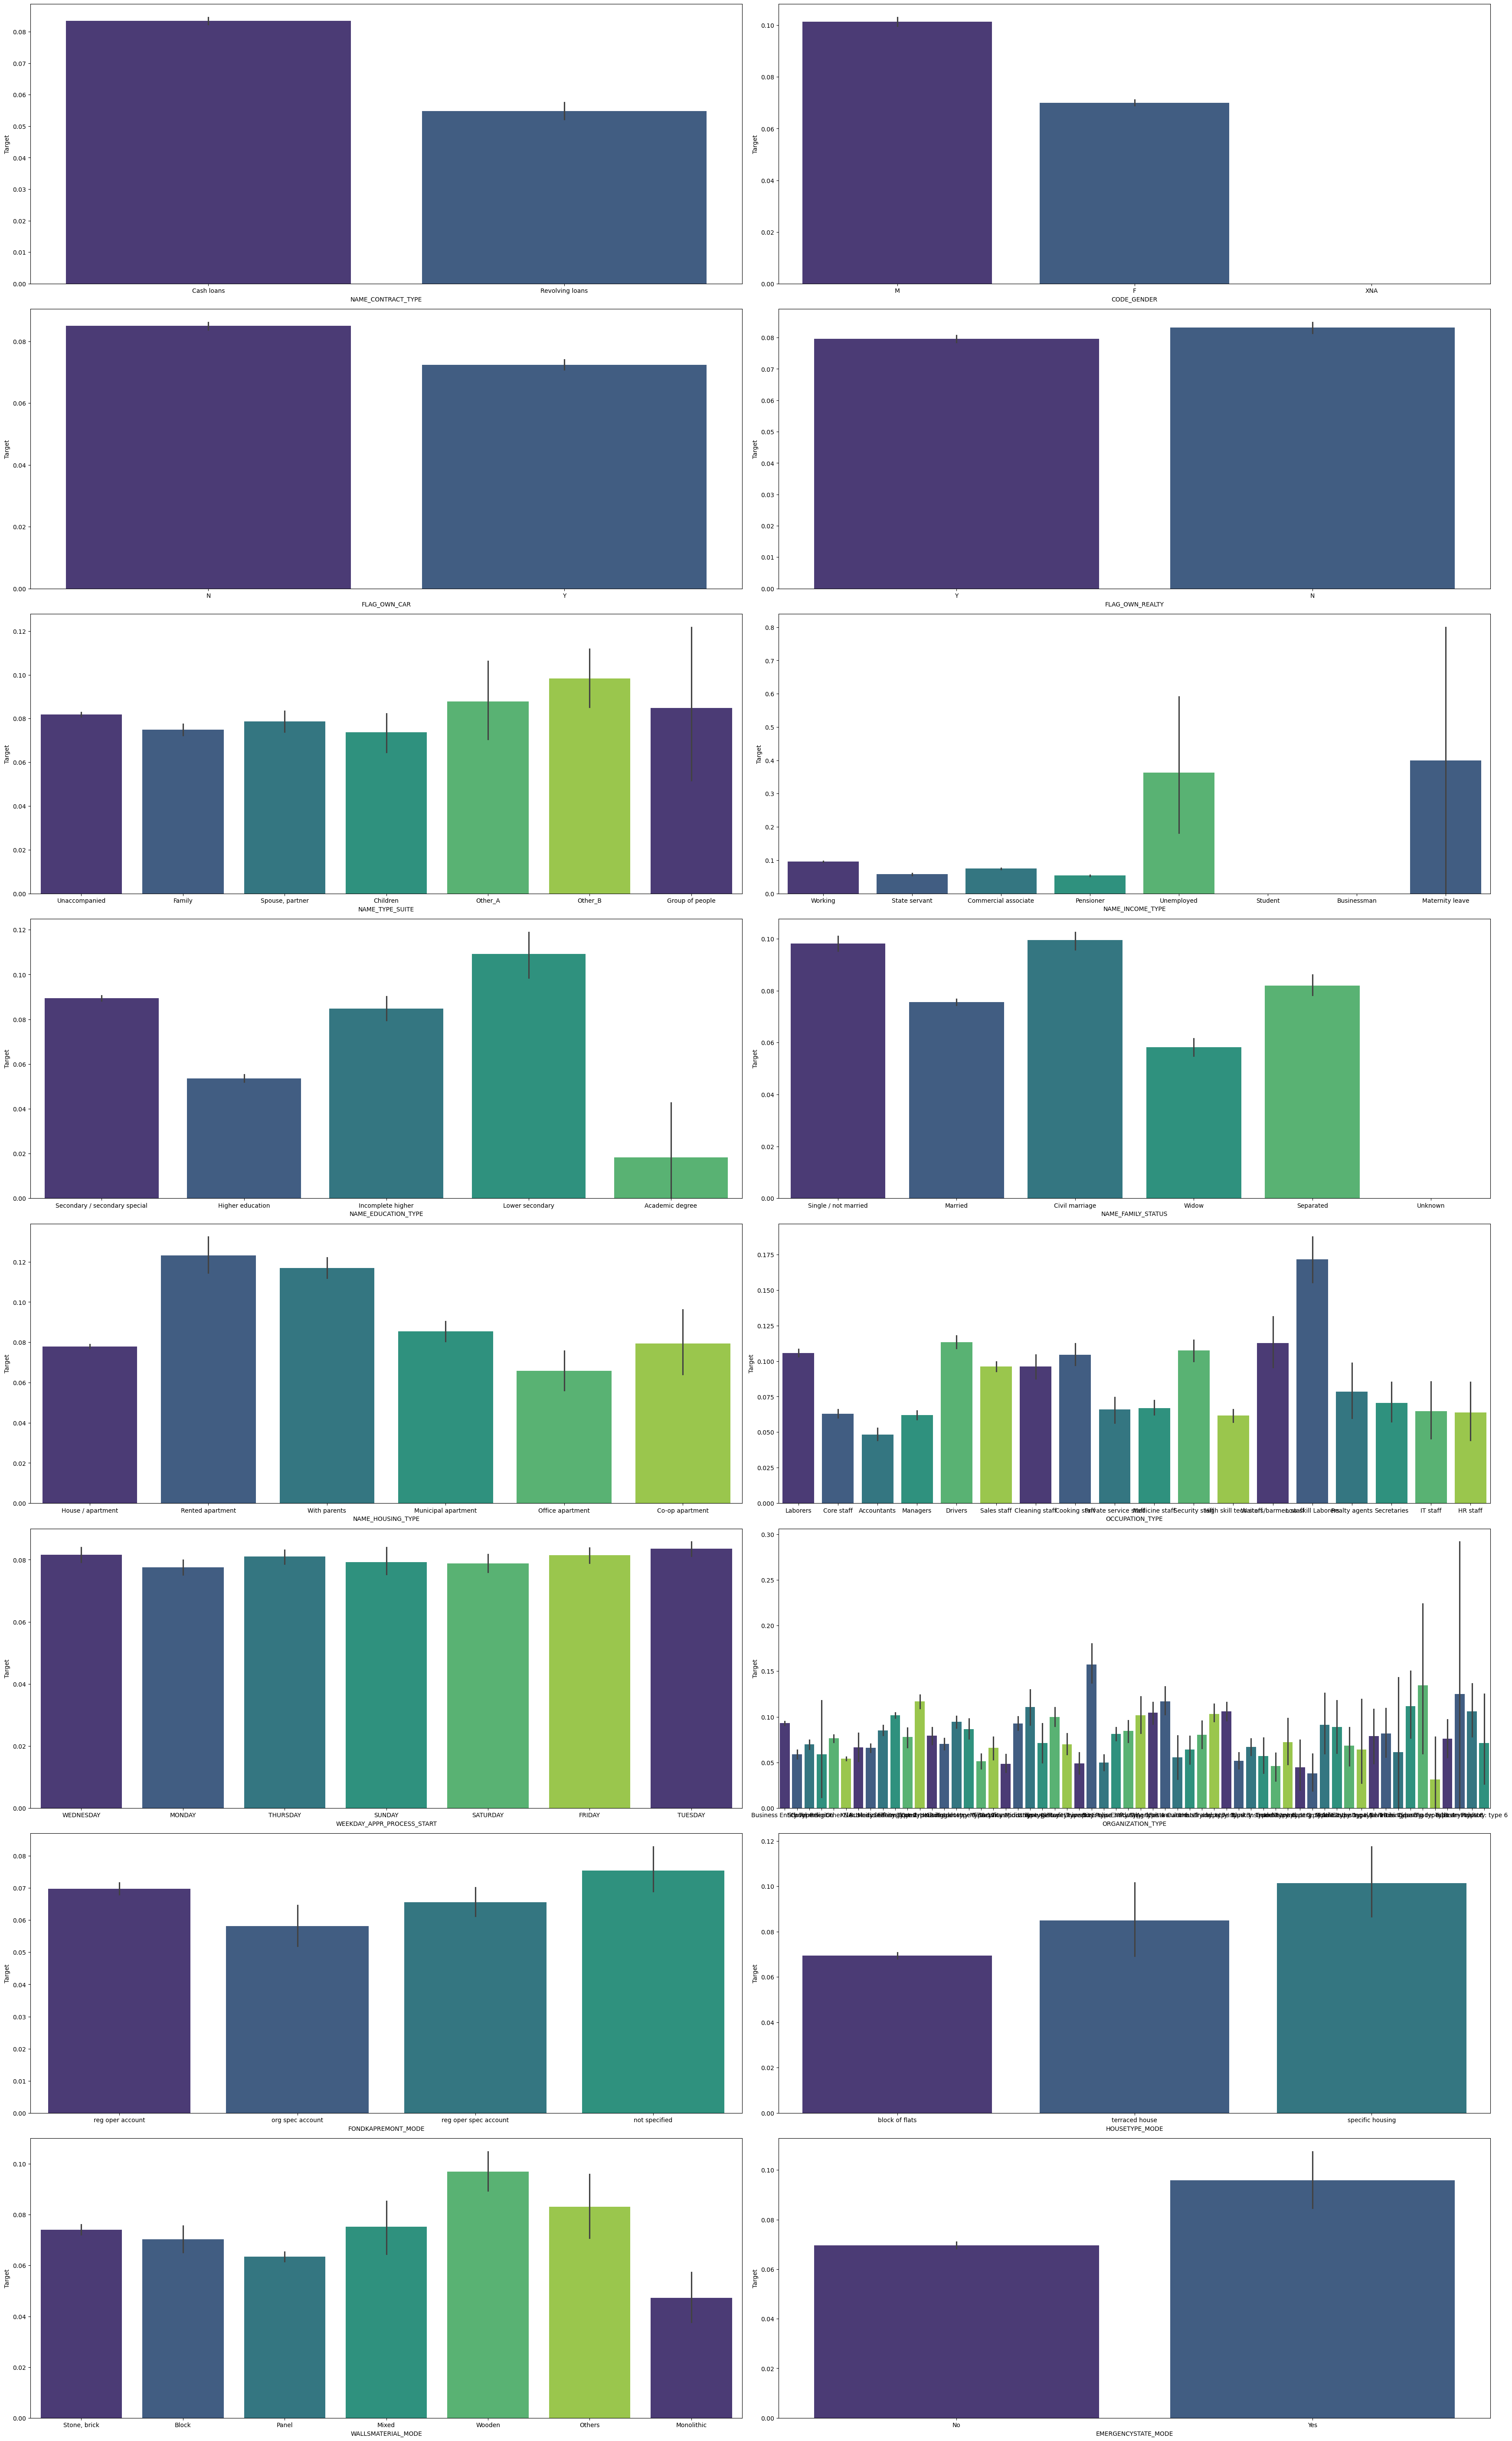

In [29]:
plt.figure(figsize=(35,70))
plotno=1
palette = sns.color_palette("viridis")
for feature in app_cat:
    if plotno<=20:
        ax=plt.subplot(10,2,plotno)
        sns.barplot(x=app[feature],y=app.TARGET, palette=palette)
        plt.xlabel(feature)
        plt.ylabel("Target")
    plotno+=1
plt.tight_layout() 

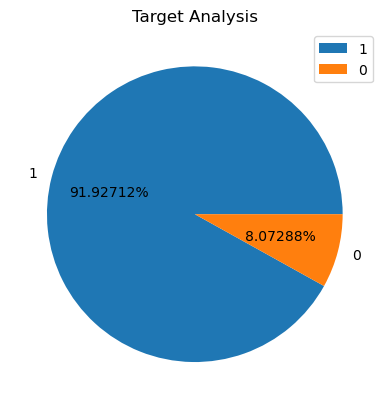

In [32]:
plt.pie(app['TARGET'].value_counts(),labels=app['TARGET'].unique(),autopct='%0.5f%%')
plt.legend()
plt.title('Target Analysis')
plt.show()

- The Target data is imbalanced because 91.9% repayed the loans and 8% not repayed

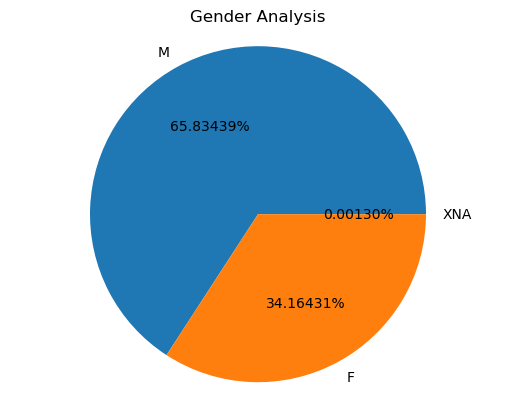

In [48]:
plt.pie(gender,labels=app['CODE_GENDER'].unique(),autopct='%1.5f%%')
plt.axis('equal')
plt.title('Gender Analysis')
plt.show()

- In Gender Column we have to do data cleaning for XNA

## *Bivariate Analysis*

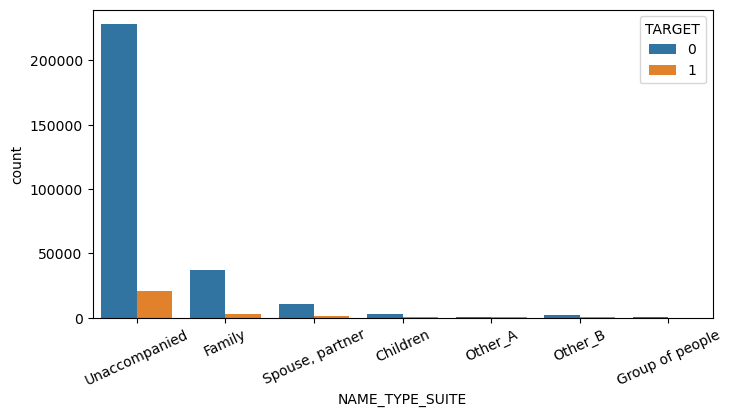

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_TYPE_SUITE',data=app,hue='TARGET')
plt.xticks(rotation=25)
plt.show()

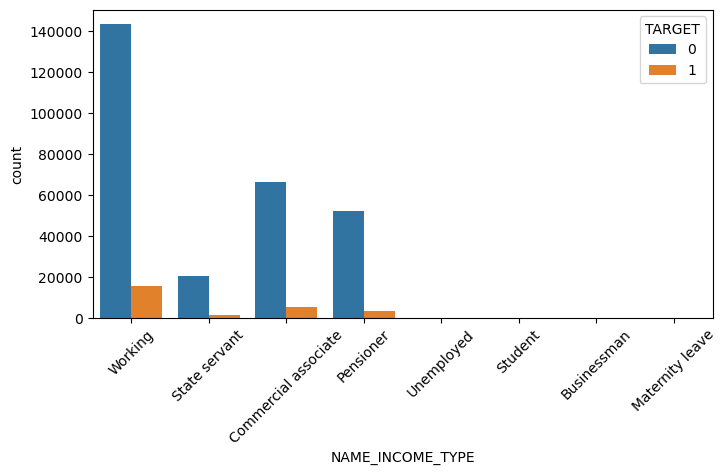

In [37]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=app,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

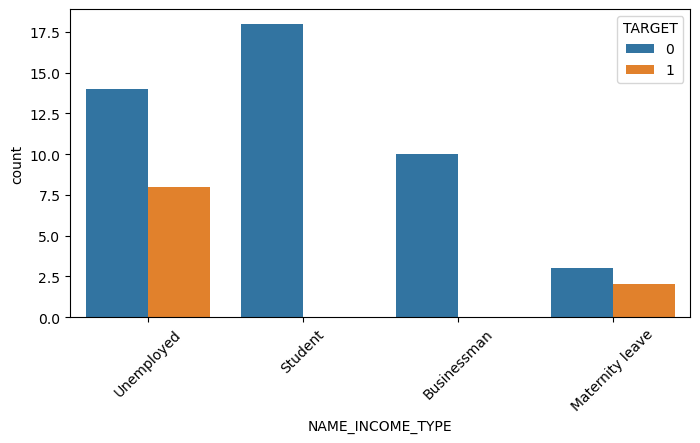

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_INCOME_TYPE',data=app[app['NAME_INCOME_TYPE'].isin(['Unemployed','Student', 'Businessman','Maternity leave'])],hue='TARGET')
plt.xticks(rotation=45)
plt.show()

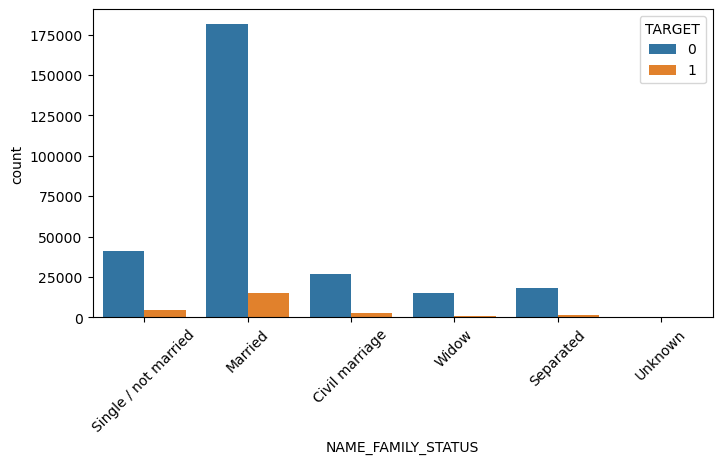

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_FAMILY_STATUS',data=app,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

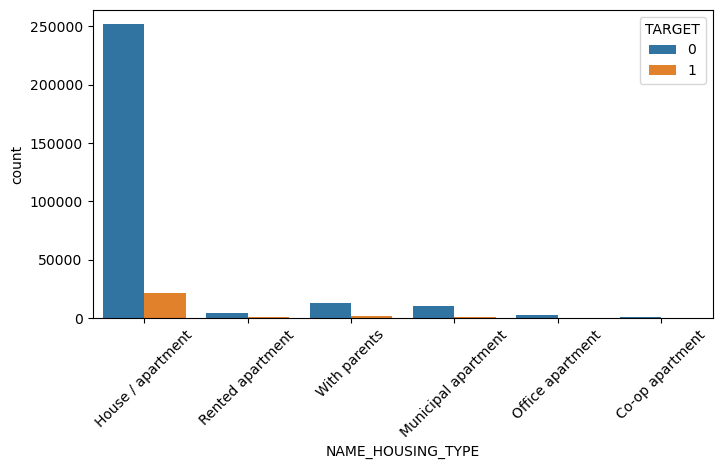

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_HOUSING_TYPE',data=app,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

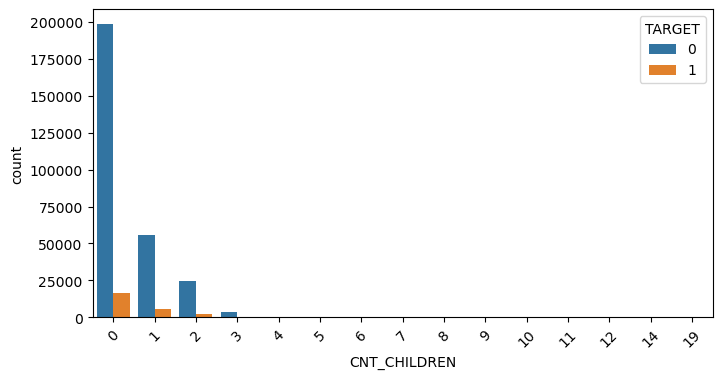

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(x='CNT_CHILDREN',data=app,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

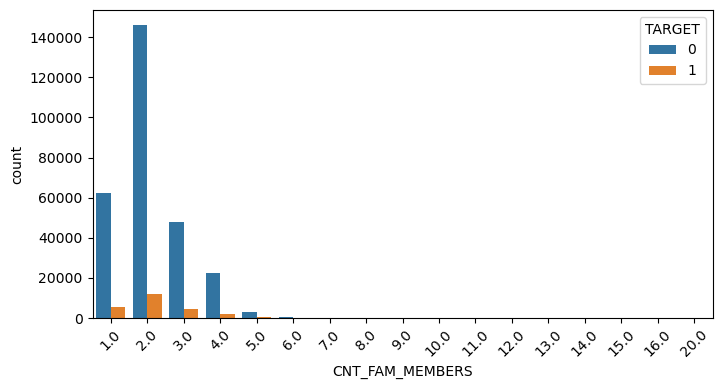

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(x='CNT_FAM_MEMBERS',data=app,hue='TARGET')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='CNT_CHILDREN'>

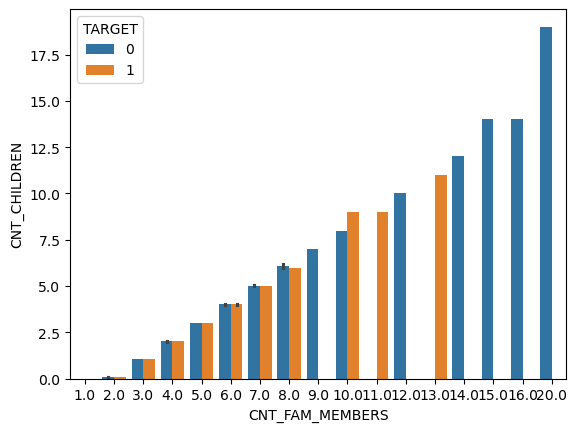

In [51]:
sns.barplot(x=app.CNT_FAM_MEMBERS,y=app.CNT_CHILDREN,hue=app.TARGET)

## *Checking Distribution*

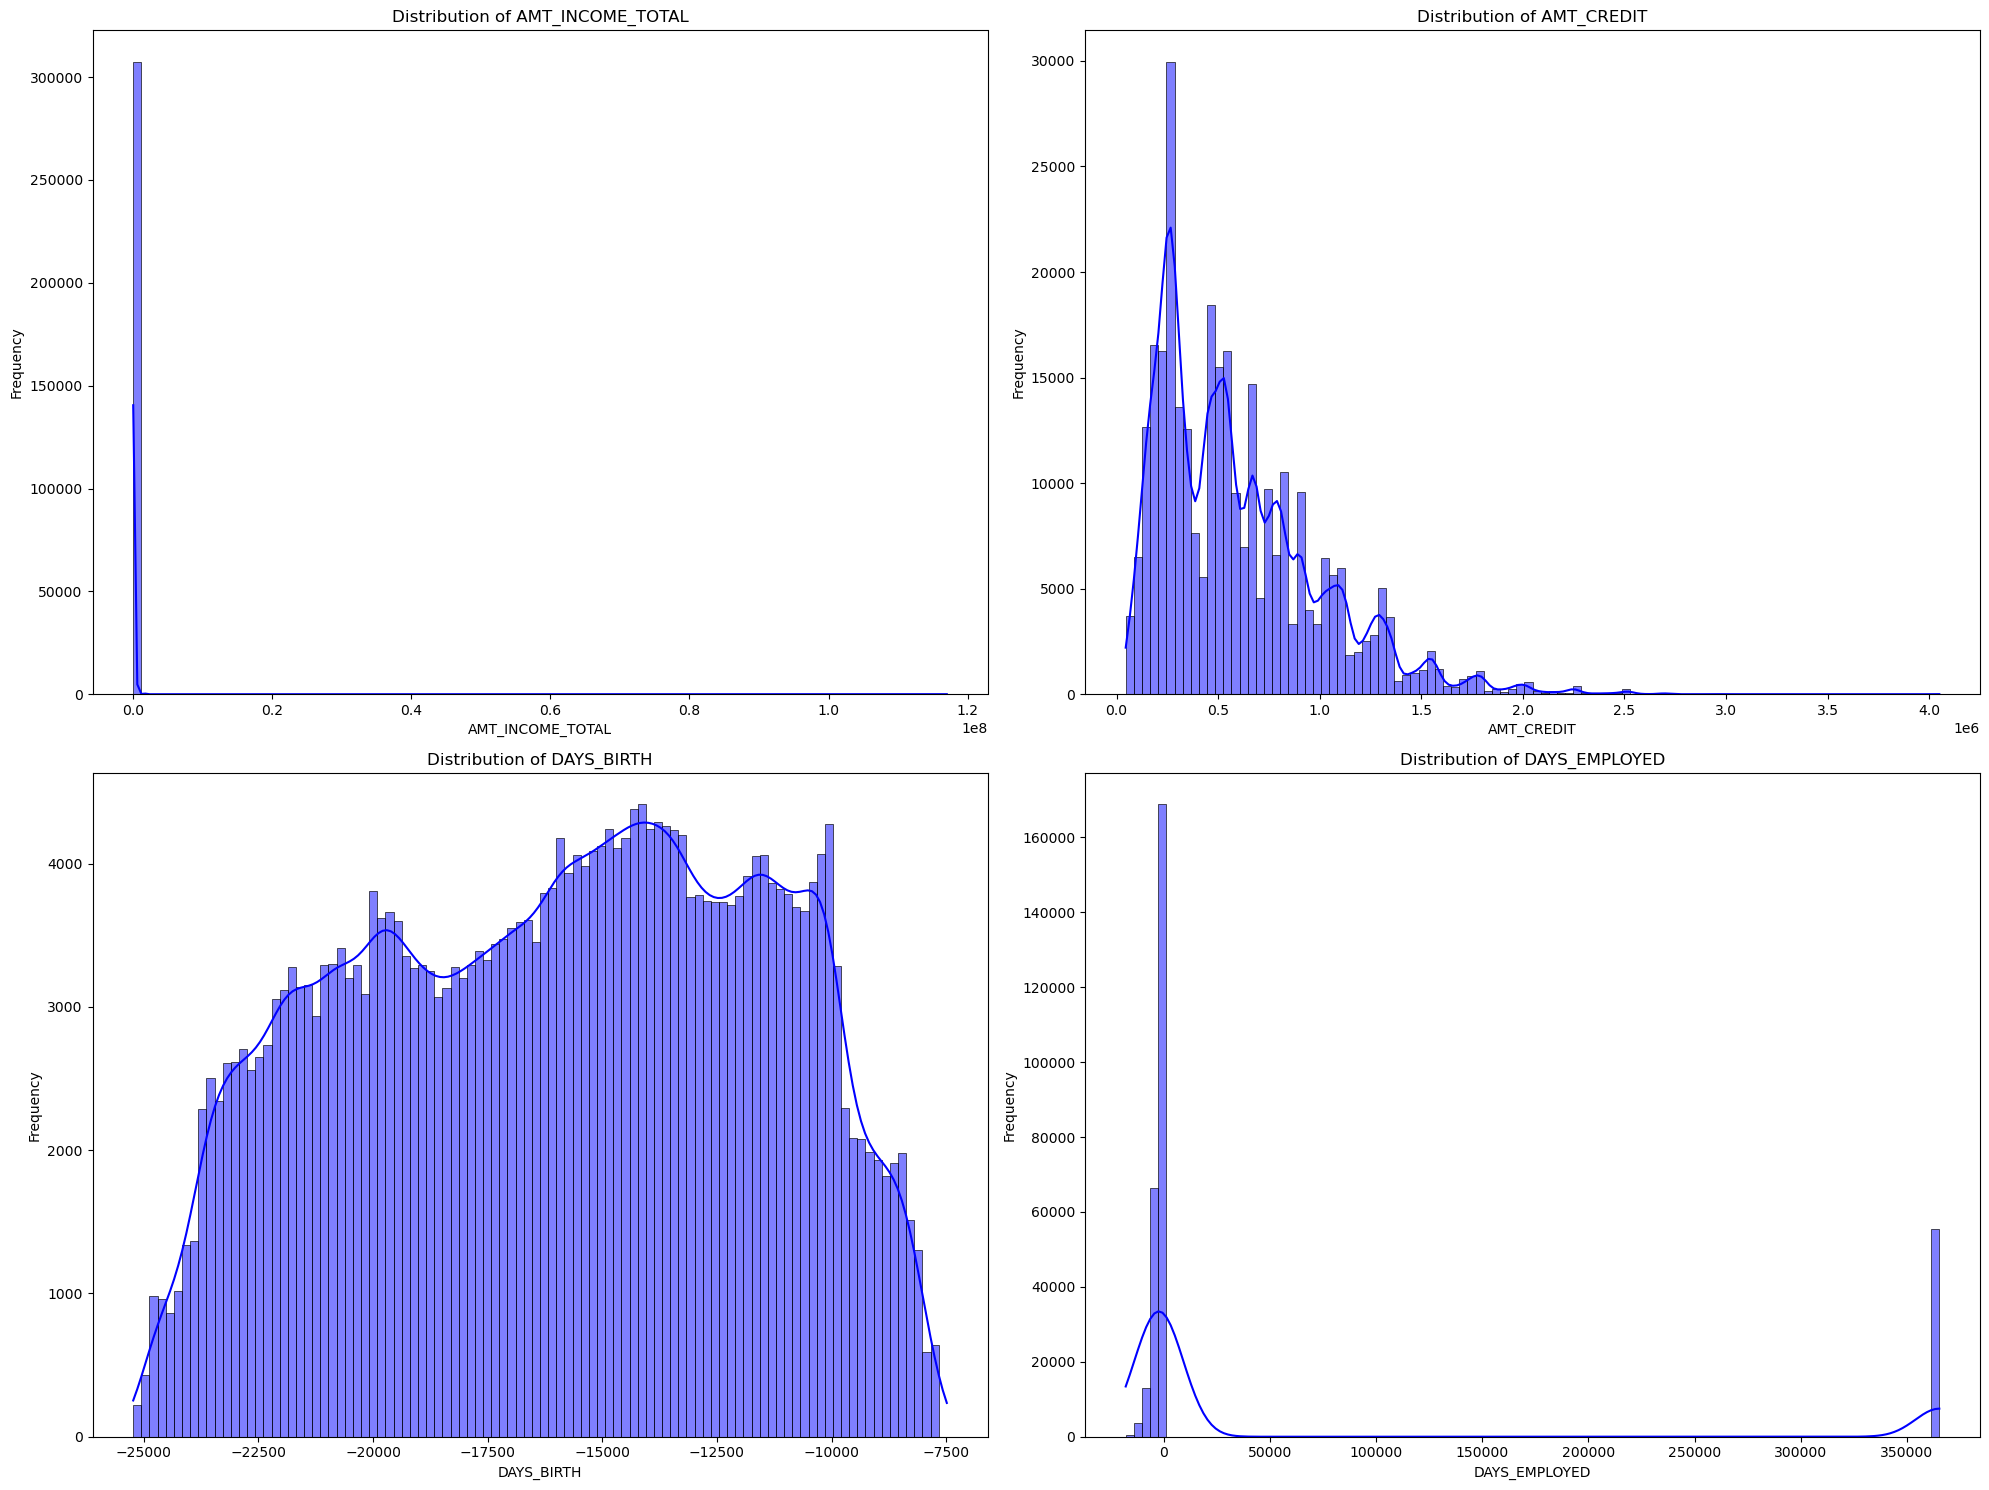

In [53]:
plt.figure(figsize=(20, 15))
columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'DAYS_EMPLOYED']
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(app[column], kde=True, color='blue', bins=100) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout() 
plt.show()


- for AMT_INCOME_TOTAL we can try printing ['AMT_INCOME_TOTAL'] < 1000000
- for AMT_CREDIT data is right skewed the we will try using log transform
- Negative values indicate age in days.The maximum (-7,489) corresponds to a person approximately 20.5 years old, while the minimum (-25,229) is about 69.1 years old. So we will do ['DAYS_BIRTH']/-365
- 350k days is an outlier

- We need to handle the 350k value of DAYS_EMPLOYED

In [76]:
# replacing the extreme value by NaN 
# The new column DAYS_EMPLOYED_ERROR helps in identifying whether an entry was missing due to the placeholder value.
app['DAYS_EMPLOYED_ERROR'] = app["DAYS_EMPLOYED"] == 365243
app['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

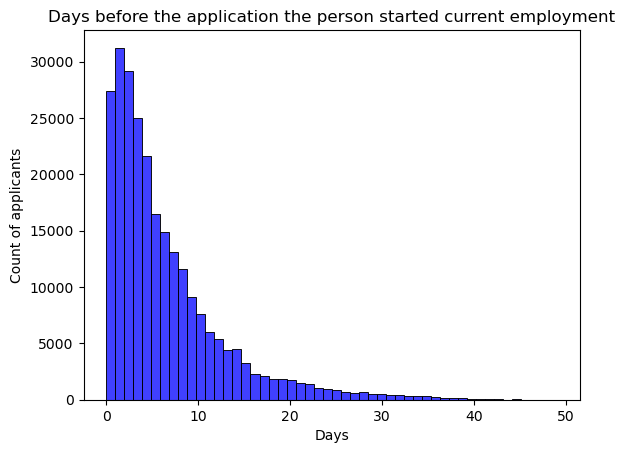

In [81]:
sns.histplot(app['DAYS_EMPLOYED']/-365, bins=50,color='blue')
plt.xlabel('Days')
plt.ylabel('Count of applicants')
plt.title('Days before the application the person started current employment')
plt.show()

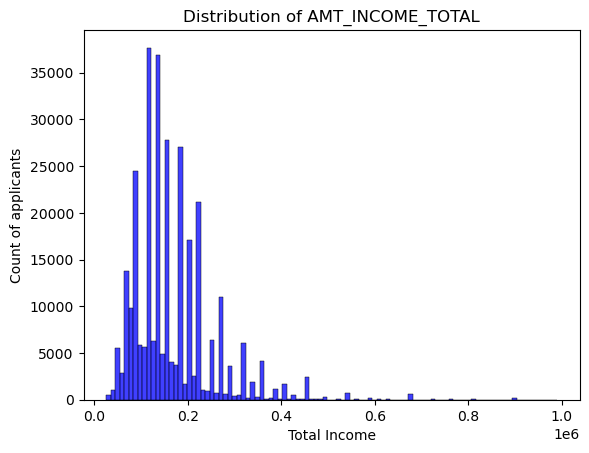

In [58]:
filtered_data = app[app['AMT_INCOME_TOTAL'] < 1000000]
sns.histplot(data=filtered_data, x='AMT_INCOME_TOTAL', bins=100, color='blue')
plt.xlabel('Total Income')
plt.ylabel('Count of applicants')
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.show()

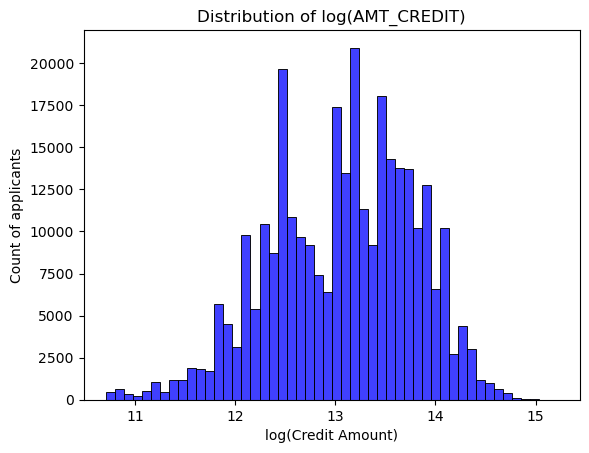

In [57]:
sns.histplot(np.log(app['AMT_CREDIT']), bins=50, color='blue')
plt.xlabel('log(Credit Amount)')
plt.ylabel('Count of applicants')
plt.title('Distribution of log(AMT_CREDIT)')
plt.show()

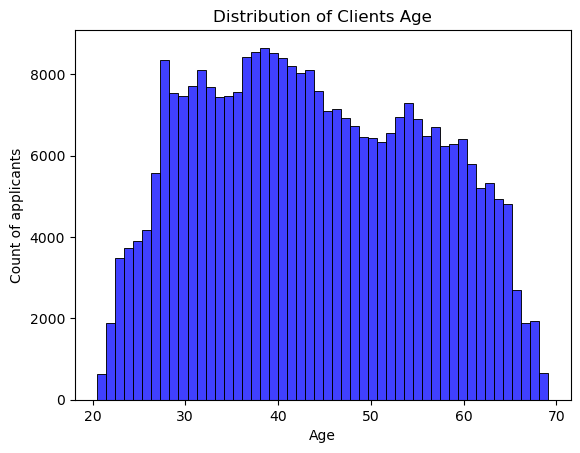

In [61]:
sns.histplot(app['DAYS_BIRTH']/-365,bins=50, color='blue')
plt.xlabel('Age')
plt.ylabel('Count of applicants')
plt.title('Distribution of Clients Age')
plt.show()

- Changing the age in original data also

In [69]:
app["Age"] = app.DAYS_BIRTH//(-365.25) 
app.drop("DAYS_BIRTH", inplace=True, axis=1)

## *Heatmap*

- As this is a very large dataset, finding correlation of each and every column will be not possible also it will consume a lot of time. Instead, we can group similar types of columns and compute correlations within these groups, which allows us to better understand relationships while reducing the load.

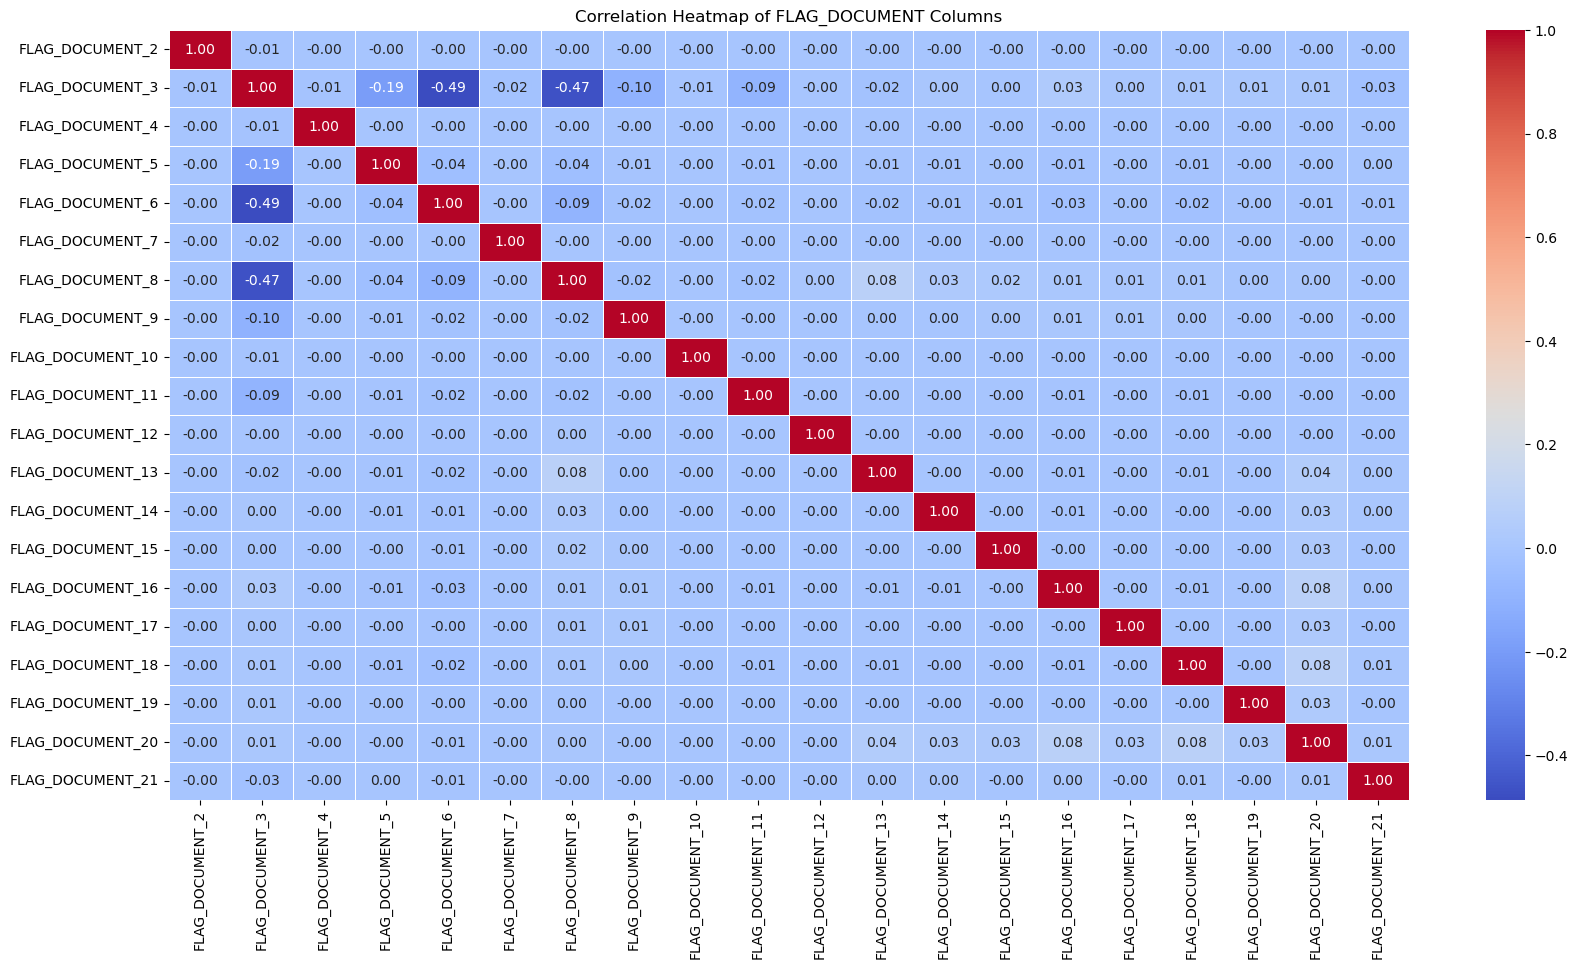

In [67]:
flag_document_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                      'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                      'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                      'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                      'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
correlation_matrix = app[flag_document_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of FLAG_DOCUMENT Columns')
plt.show()

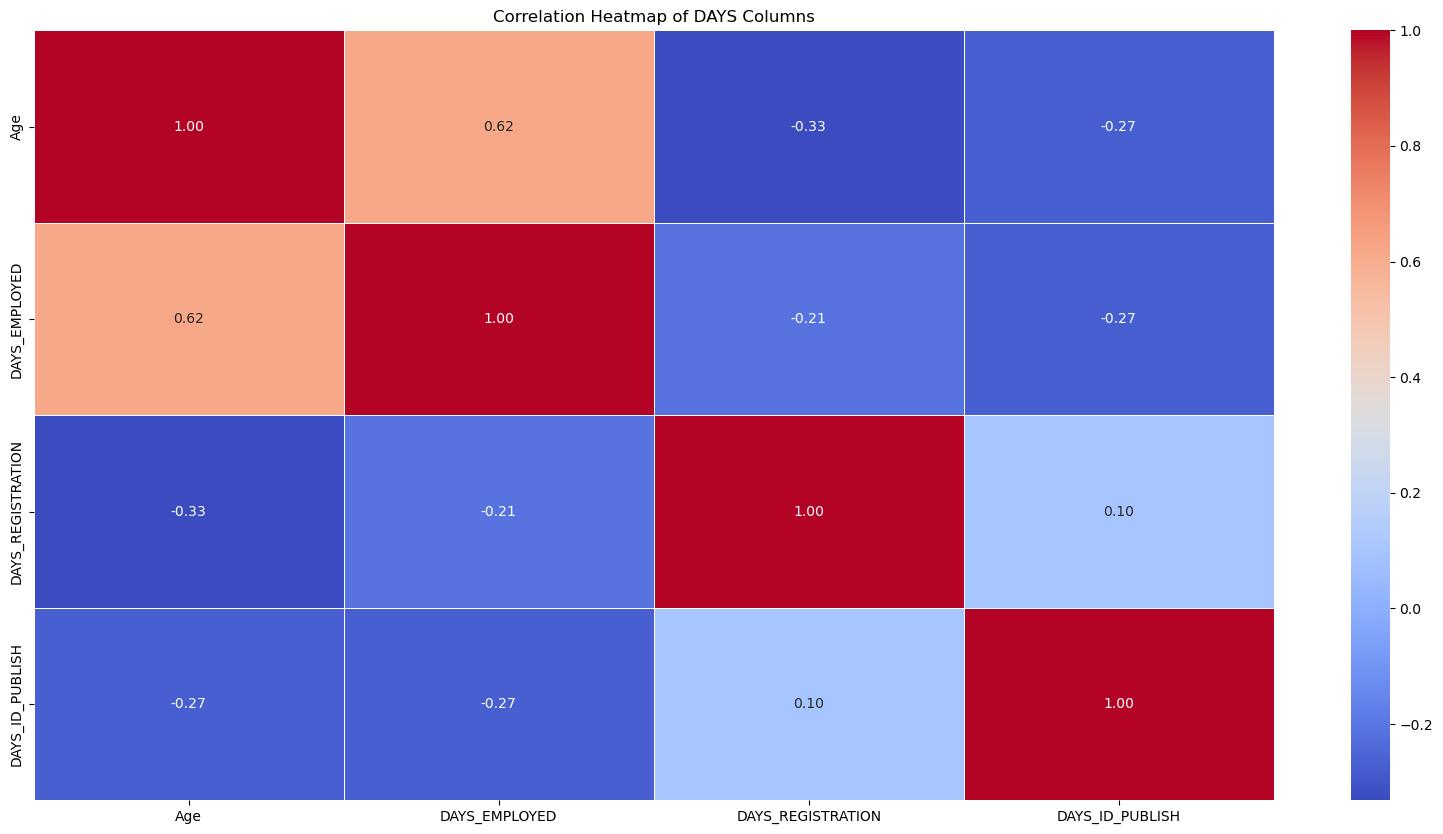

In [73]:
days_cols = ['Age', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
correlation_matrix = app[days_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of DAYS Columns')
plt.show()

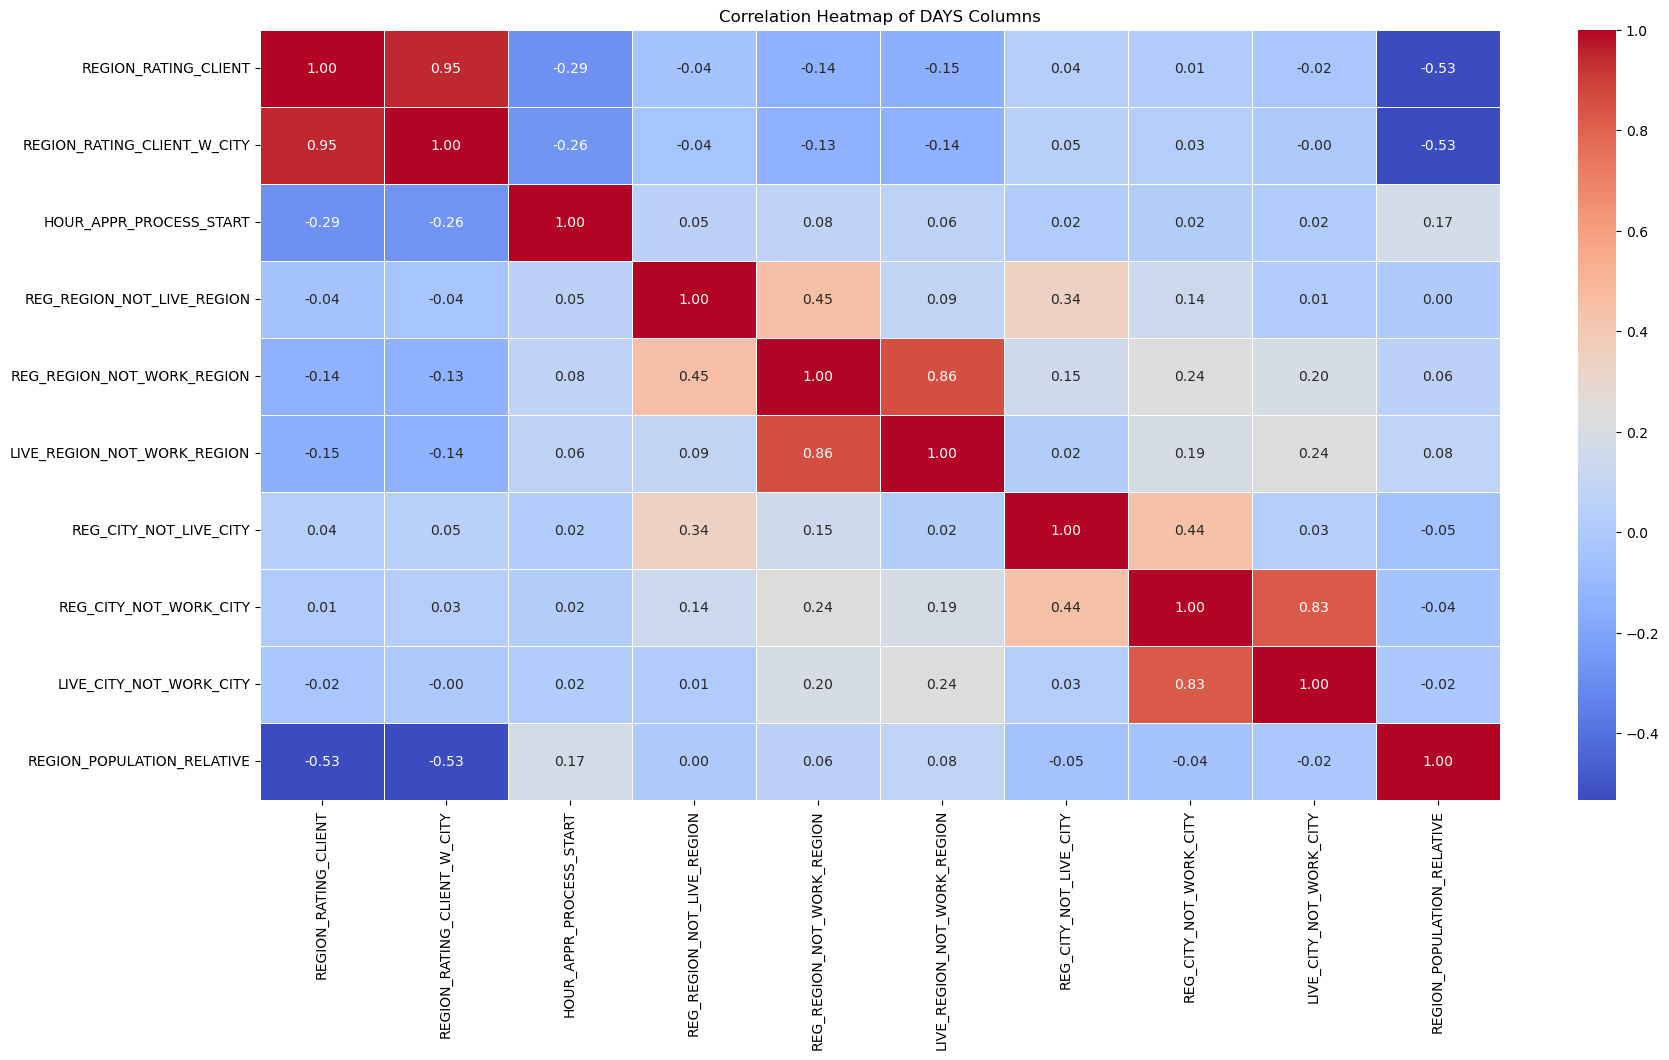

In [74]:
region_cols = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_POPULATION_RELATIVE']
correlation_matrix = app[region_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of DAYS Columns')
plt.show()

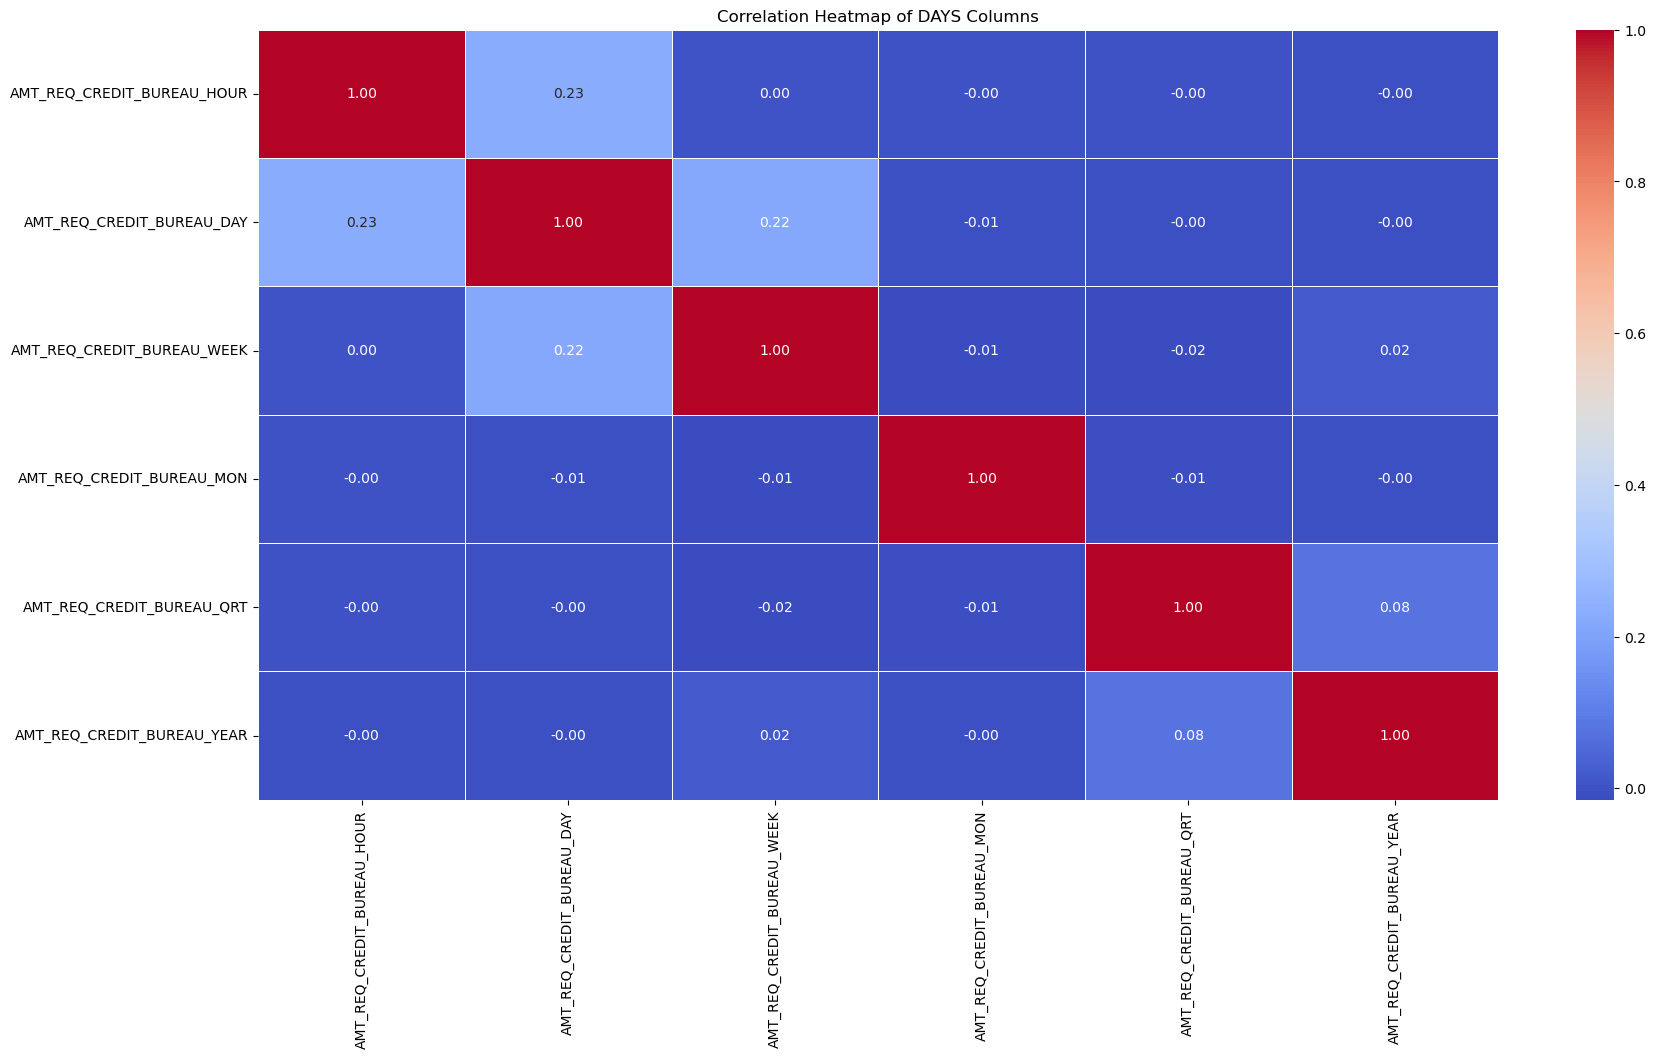

In [75]:
amt_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
correlation_matrix = app[amt_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of DAYS Columns')
plt.show()